In [2]:
import openmc
import os 
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from pathlib import Path
import sys 
import numpy as np

CWD = Path.cwd().resolve()
project_root = Path.cwd().parents[2]
sys.path.append(str(project_root))

from parameters.parameters_paths import PATH_TO_CROSS_SECTIONS
from src.utils.pre_processing.pre_processing import *
from src.utils.common.isotope import Isotope

os.environ["OPENMC_CROSS_SECTIONS"] = PATH_TO_CROSS_SECTIONS


In [3]:
cesium_137 = Isotope("Cs137")
cobalt_60 = Isotope("Co60")

In [4]:
activity = cesium_137.activity(1.0)  # 1 g of Cs137
print(f"Activity of 1 kg of {cesium_137.name}: {activity:.3E} Bq")
mass = cesium_137.mass(activity)
print(f"Mass of {activity:.3E} Bq of {cesium_137.name}: {mass:.3E} kg")

Activity of 1 kg of Cs137: 3.212E+12 Bq
Mass of 3.212E+12 Bq of Cs137: 1.000E+00 kg


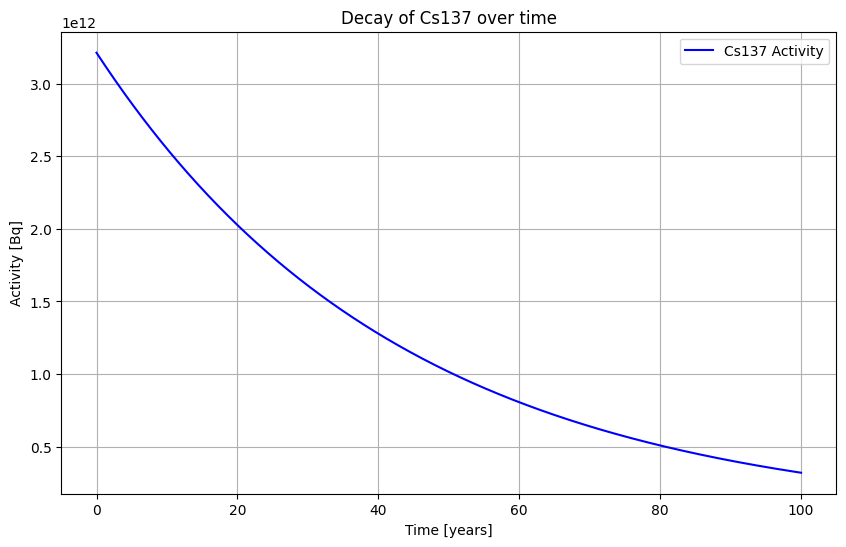

In [5]:
mass = 1.0  # mass in g
time_array = np.linspace(0, 86400*365.25*100, 1000)  # time in seconds
activity_array_cesium = cesium_137.massic_activity * mass * np.exp(-cesium_137.decay_constant * time_array)
plt.figure(figsize=(10, 6))
plt.plot(time_array / (86400*365.25), activity_array_cesium, label=f"{cesium_137.name} Activity", color='blue')
plt.xlabel("Time [years]")
plt.ylabel("Activity [Bq]")
plt.title(f"Decay of {cesium_137.name} over time")
plt.grid()
plt.legend()
plt.show()

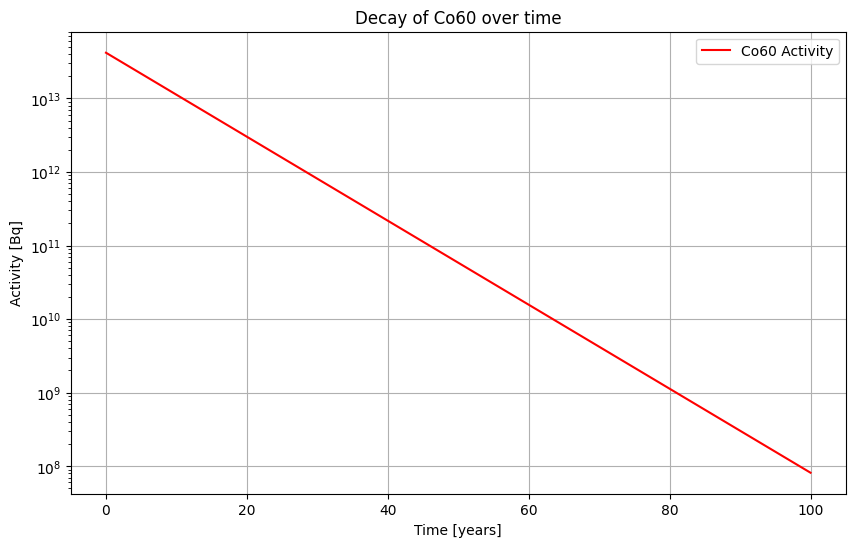

In [6]:
mass = 1.0  # mass in g
time_array = np.linspace(0, 86400*365.25*100, 1000)  # time in seconds
activity_array_cobalt = cobalt_60.massic_activity * mass * np.exp(-cobalt_60.decay_constant * time_array)
plt.figure(figsize=(10, 6))
plt.semilogy(time_array / (86400*365.25), activity_array_cobalt, label=f"{cobalt_60.name} Activity", color='red')
plt.xlabel("Time [years]")
plt.ylabel("Activity [Bq]")
plt.title(f"Decay of {cobalt_60.name} over time")
plt.grid()
plt.legend()
plt.show()

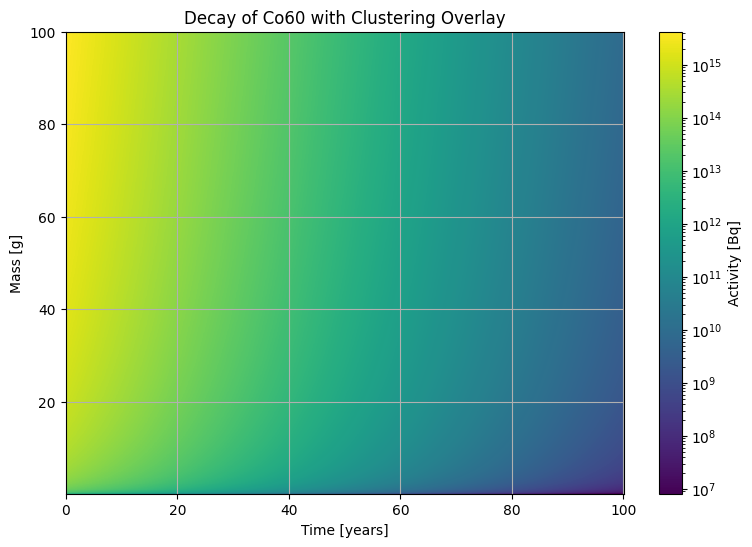

In [7]:
mass_array = np.linspace(0.1, 100, 1000)  # mass in g
time_array = np.linspace(0, 86400*365.25*100, 1000)  # time in seconds

# Calculate activity array for cobalt-60
activity_array_cobalt = cobalt_60.massic_activity * mass_array[:, np.newaxis] * np.exp(-cobalt_60.decay_constant * time_array)

plt.figure(figsize=(9, 6))
plt.pcolormesh(time_array / (86400*365.25), mass_array, activity_array_cobalt, shading='auto', norm=LogNorm())
plt.xlabel("Time [years]")
plt.ylabel("Mass [g]")
plt.title(f"Decay of {cobalt_60.name} with Clustering Overlay")
plt.colorbar(label="Activity [Bq]")
plt.grid()
plt.show()

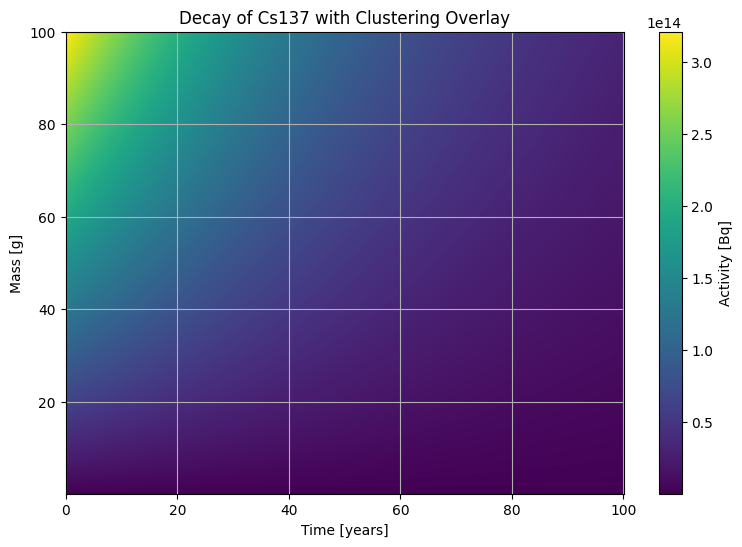

In [8]:
# Calculate activity array for cesium-137
activity_array_cesium = cesium_137.massic_activity * mass_array[:, np.newaxis] * np.exp(-cesium_137.decay_constant * time_array)
plt.figure(figsize=(9, 6))
plt.pcolormesh(time_array / (86400*365.25), mass_array, activity_array_cesium, shading='auto')
plt.xlabel("Time [years]")
plt.ylabel("Mass [g]")
plt.title(f"Decay of {cesium_137.name} with Clustering Overlay")
plt.colorbar(label="Activity [Bq]")
plt.grid()
plt.show()